In [2]:
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Distributions.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

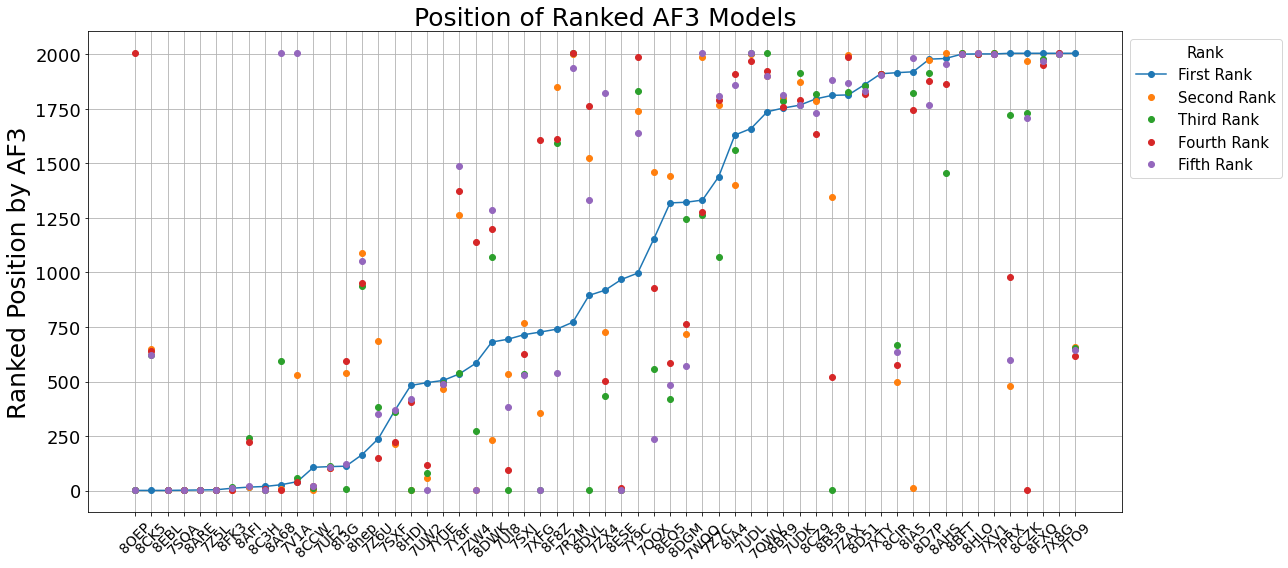

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Distributions.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

def extract_positions(input_dir, model_suffix):
    positions = {}
    
    # Iterate through each file in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith(".xlsx") or filename.endswith(".xls"):
            pdb_id = filename.split('_')[0]  # Extract pdb_id from filename
            input_file_path = os.path.join(input_dir, filename)
            
            # Load the Excel file
            try:
                df = pd.read_excel(input_file_path)
            except Exception as e:
                print(f"Error reading file: {filename}, Error: {e}")
                continue
            
            # Check if 'File Name' and 'Position' columns exist
            if 'File Name' not in df.columns or 'Position' not in df.columns:
                print(f"Columns missing in file: {filename}")
                continue
            
            # Filter for rows where 'File Name' ends with the given model_suffix
            row = df[df['File Name'].str.endswith(model_suffix)]
            if not row.empty:
                positions[pdb_id] = row['Position'].values[0]
            else:
                print(f"No matching rows found for file: {filename} with suffix: {model_suffix}")

    return positions

def plot_positions(input_dir, model_suffixes, output_dir):
    # Adjust font sizes here
    plt.rcParams.update({
        'axes.titlesize': 25,
        'axes.labelsize': 25,
        'xtick.labelsize': 14,
        'ytick.labelsize': 18,
        'legend.fontsize': 15,
        'legend.title_fontsize': 15
    })
    
    # Dictionary to store positions for each suffix
    all_positions = {}
    color_map = {}  # Dictionary to store colors for each suffix
    
    # Dictionary for custom plot titles
    suffix_titles = {
        '_model_0.pdb_clean_AF3': 'First Rank',
        '_model_1.pdb_clean_AF3': 'Second Rank',
        '_model_2.pdb_clean_AF3': 'Third Rank',
        '_model_3.pdb_clean_AF3': 'Fourth Rank',
        '_model_4.pdb_clean_AF3': 'Fifth Rank'
    }
    
    # Extract positions for all suffixes
    for suffix in model_suffixes:
        positions = extract_positions(input_dir, suffix)
        all_positions[suffix] = positions
    
    # Sort PDBs based on the first rank model values
    first_rank_positions = all_positions['_model_0.pdb_clean_AF3']
    sorted_pdbs = sorted(first_rank_positions.keys(), key=lambda x: first_rank_positions[x])
    
    # Plot the combined graph first and save the colors used
    plt.figure(figsize=(18, 8), facecolor='white')  # Increase the plot size and set the facecolor to white
    for suffix in model_suffixes:
        positions = all_positions[suffix]
        if positions:  # Ensure there are positions to plot
            x = sorted_pdbs
            y = [positions[pdb] for pdb in sorted_pdbs]
            if suffix == '_model_0.pdb_clean_AF3':
                line, = plt.plot(x, y, marker='o', linestyle='-', label=suffix_titles[suffix])  # Connect first rank dots with a line
            else:
                line, = plt.plot(x, y, marker='o', linestyle='', label=suffix_titles[suffix])  # Plot other ranks without lines
            color_map[suffix] = mcolors.to_hex(line.get_color())
        else:
            print(f"No positions found for suffix: {suffix}")
    
    plt.ylabel('Ranked Position by AF3')
    plt.title('Position of Ranked AF3 Models')
    plt.xticks(rotation=45)
    plt.legend(title='Rank', loc='upper left', bbox_to_anchor=(1, 1), handlelength=2)  # Add a title to the legend and place it outside the plot
    plt.grid(True)  # Add a grid for better readability
    plt.tight_layout()
    # Save the combined plot
    combined_output_file_path = os.path.join(output_dir, 'Fig_S15_a.png')
    plt.savefig(combined_output_file_path, format='png', dpi=1000, facecolor='white', edgecolor='none')
    plt.show()
    
    # Plot each suffix separately using the same colors and save the plots
    for suffix, positions in all_positions.items():
        if positions:  # Ensure there are positions to plot
            plt.figure(figsize=(19, 8), facecolor='white')
            x = sorted_pdbs
            y = [positions[pdb] for pdb in sorted_pdbs]
            plt.plot(x, y, marker='o', linestyle='', label=suffix_titles[suffix], color=color_map[suffix])
            #plt.xlabel('PDB ID')
            plt.ylabel('Ranked Position')
            plt.title(f'Position of Ranked Models for {suffix_titles[suffix]}')
            plt.xticks(rotation=45)
            plt.legend(title='Rank', loc='upper left', bbox_to_anchor=(1, 1), handlelength=2)  # Add a title to the legend and place it outside the plot
            plt.grid(True)  # Add a grid for better readability
            plt.tight_layout()
            output_file_path = os.path.join(output_dir, f'{suffix_titles[suffix].replace(" ", "_")}.png')
            plt.savefig(output_file_path, format='png', dpi=1000, facecolor='white', edgecolor='none')
            plt.close()

# Load the configuration
load_config()

# Define the input directory, model suffixes, and output directory from the config file
input_dir = config["AF3_Data"]
output_dir = config["Supp_Figures_directory"]
model_suffixes = ['_model_0.pdb_clean_AF3', '_model_1.pdb_clean_AF3', '_model_2.pdb_clean_AF3', '_model_3.pdb_clean_AF3', '_model_4.pdb_clean_AF3']

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Plot positions for all specified model suffixes and save the plots
plot_positions(input_dir, model_suffixes, output_dir)


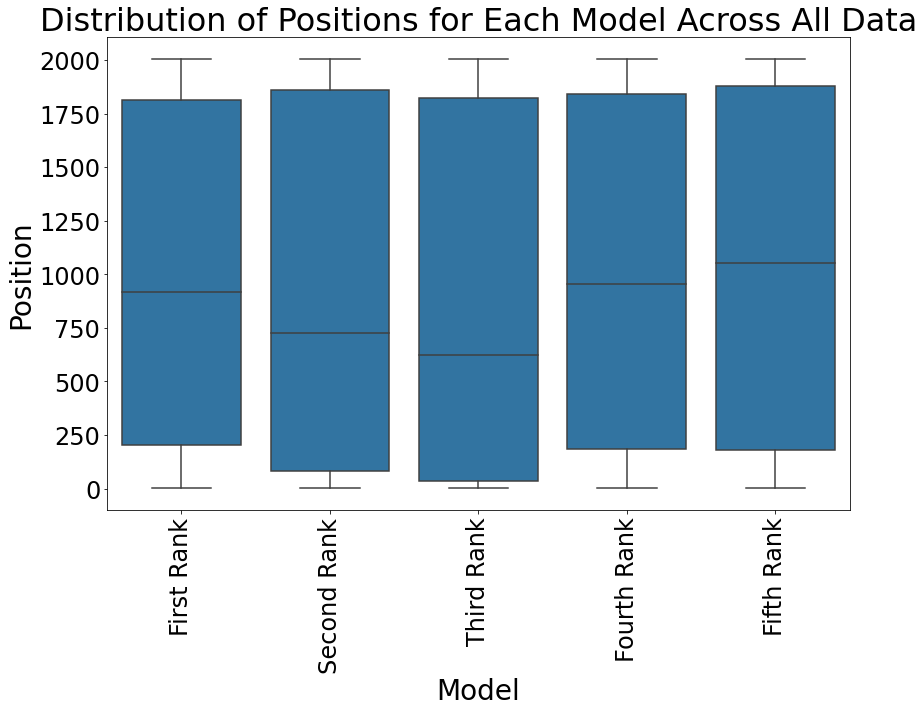

Numerical Details for Each Model:
First Rank:
  Count: 59
  Mean: 1018.03
  Median: 919.00
  Std Dev: 773.43
  Min: 1
  Max: 2005

Second Rank:
  Count: 59
  Mean: 986.10
  Median: 726.00
  Std Dev: 812.46
  Min: 1
  Max: 2005

Third Rank:
  Count: 59
  Mean: 905.51
  Median: 622.00
  Std Dev: 804.09
  Min: 1
  Max: 2005

Fourth Rank:
  Count: 59
  Mean: 1018.86
  Median: 954.00
  Std Dev: 789.18
  Min: 2
  Max: 2005

Fifth Rank:
  Count: 59
  Mean: 1042.83
  Median: 1051.00
  Std Dev: 825.53
  Min: 1
  Max: 2005



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

# Load configuration and define a global variable
def load_config():
    global config
    with open('config_Distributions.json') as config_file:
        config = json.load(config_file)

# Call the function to load the configuration
load_config()

# Define the input and output directories from the config file
data_folder = config["AF3_Data"]
save_directory = config["Supp_Figures_directory"]

# Automatically list all Excel files in the directory
extracted_excel_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.xlsx')]

# Container for all dataframes
combined_data = []

# Specific models to extract
specific_models = ['_model_0.pdb_clean_AF3', '_model_1.pdb_clean_AF3', 
                   '_model_2.pdb_clean_AF3', '_model_3.pdb_clean_AF3', 
                   '_model_4.pdb_clean_AF3']

# Process each Excel file
for file_path in extracted_excel_files:
    df = pd.read_excel(file_path, engine='openpyxl')
    if 'File Name' in df.columns and 'Position' in df.columns:
        df['Model'] = df['File Name'].str.extract(r'(_model_\d+\.pdb_clean_AF3)')[0]
        filtered_df = df[df['Model'].isin(specific_models)]
        combined_data.append(filtered_df[['Model', 'Position']])

# Concatenate all dataframes into a single dataframe
all_models_data = pd.concat(combined_data, ignore_index=True)

# Rename models for nicer labeling on the plot
model_renames = {
    '_model_0.pdb_clean_AF3': 'First Rank',
    '_model_1.pdb_clean_AF3': 'Second Rank',
    '_model_2.pdb_clean_AF3': 'Third Rank',
    '_model_3.pdb_clean_AF3': 'Fourth Rank',
    '_model_4.pdb_clean_AF3': 'Fifth Rank',
}
all_models_data['Model'] = all_models_data['Model'].replace(model_renames)

# Ensure the 'Position' data is numeric
all_models_data['Position'] = pd.to_numeric(all_models_data['Position'], errors='coerce')

# Drop rows with NaN values in 'Position' or 'Model'
all_models_data = all_models_data.dropna(subset=['Position', 'Model'])

# Ensure the correct order of models
order = ['First Rank', 'Second Rank', 'Third Rank', 'Fourth Rank', 'Fifth Rank']

# Define a single color for the box plots
box_color = '#1f77b4'  # Choose your desired color here

# Font size parameters
title_fontsize = 32
label_fontsize = 28
tick_fontsize = 24

# Create the box plot with a single color
plt.figure(figsize=(12, 10), facecolor='white')
ax = sns.boxplot(x='Model', y='Position', data=all_models_data, order=order, color=box_color, showfliers=False)

# Set font sizes for plot elements
plt.xticks(rotation=90, fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlabel('Model', fontsize=label_fontsize)
plt.ylabel('Position', fontsize=label_fontsize)
plt.title('Distribution of Positions for Each Model Across All Data', fontsize=title_fontsize)
plt.tight_layout()

# Filename for the saved plot
save_filename = 'Fig_S15_b.png'

# Full path for saving the plot
save_path = os.path.join(save_directory, save_filename)

# Save the plot with white background
plt.savefig(save_path, dpi=1000, bbox_inches='tight', facecolor='white', edgecolor='none')

# Display the plot
plt.show()

# Print the numerical details for each model
print("Numerical Details for Each Model:")
for model in order:
    model_data = all_models_data[all_models_data['Model'] == model]['Position']
    print(f"{model}:")
    print(f"  Count: {model_data.count()}")
    print(f"  Mean: {model_data.mean():.2f}")
    print(f"  Median: {model_data.median():.2f}")
    print(f"  Std Dev: {model_data.std():.2f}")
    print(f"  Min: {model_data.min()}")
    print(f"  Max: {model_data.max()}")
    print()
